In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
# survival rate by gender
titanic.groupby('sex')["survived"].describe()
# look at mean below

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,314.0,0.742038,0.438211,0.0,0.0,1.0,1.0,1.0
male,577.0,0.188908,0.391775,0.0,0.0,0.0,0.0,1.0


In [5]:
# or you can do this
titanic.groupby('sex')["survived"].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [6]:
# now do by gender and class
titanic.groupby(['sex', 'class'])["survived"].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [7]:
# author says this grouping by multiple columns can get unwieldy and pandas has pivot table to help

titanic.pivot_table("survived", index="sex", columns="class")

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [8]:
age = pd.cut(titanic["age"], [0, 18, 80], labels=["<=18", ">18"])
age

0      >18
1      >18
2      >18
3      >18
4      >18
      ... 
886    >18
887    >18
888    NaN
889    >18
890    >18
Name: age, Length: 891, dtype: category
Categories (2, object): ['<=18' < '>18']

In [9]:
titanic.pivot_table("survived", ["sex", age], "class")

class           First    Second     Third
sex    age                               
female <=18  0.909091  1.000000  0.511628
       >18   0.972973  0.900000  0.423729
male   <=18  0.800000  0.600000  0.215686
       >18   0.375000  0.071429  0.133663

In [10]:
fare = pd.qcut(titanic["fare"], 2)
titanic.pivot_table("survived", ["sex", age], [fare, "class"])

fare        (-0.001, 14.454]                     (14.454, 512.329]            \
class                  First    Second     Third             First    Second   
sex    age                                                                     
female <=18              NaN  1.000000  0.714286          0.909091  1.000000   
       >18               NaN  0.880000  0.444444          0.972973  0.914286   
male   <=18              NaN  0.000000  0.260870          0.800000  0.818182   
       >18               0.0  0.098039  0.125000          0.391304  0.030303   

fare                   
class           Third  
sex    age             
female <=18  0.318182  
       >18   0.391304  
male   <=18  0.178571  
       >18   0.192308

In [11]:
# this is call. Default aggregation function is mena, but can be specified via param
# also, you can specify a mapping that maps column to aggregation function
titanic.pivot_table(index="sex", columns="class", aggfunc={"survived": sum, "fare": "mean"})


fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [12]:
# VERY COOL, to add totals, include margins param
titanic.pivot_table("survived", index="sex", columns="class", margins=True, margins_name="Total")

class,First,Second,Third,Total
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
Total,0.629630,0.472826,0.242363,0.383838


## Example of birth rate

Data from curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

In [14]:
births = pd.read_csv('births.csv')

In [19]:
births.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [22]:
# add decade column
births["decade"] = births["year"] // 10 * 10
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [25]:
births.pivot_table("births", index="decade", columns="gender", aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'total births per year')

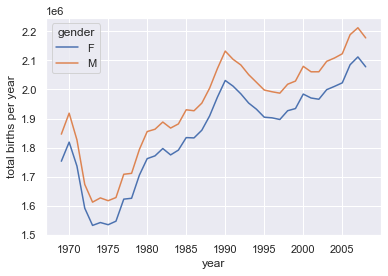

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # use seaborn styles
births.pivot_table("births", index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

In [29]:
# data cleaning
# author suggests there are invalid dates, missing values and fastest way to get rid of them is to remove outliers...

quartiles = np.percentile(births["births"], [25, 50, 75])
print(quartiles)
mu = quartiles[1]
sigma = 0.74 * (quartiles[2] - quartiles[0])

[4358.  4814.  5289.5]


In [30]:
births = births.query('(births > @mu - 5 * @sigma) & (births < @mu + 5 * @sigma)')

In [31]:
births.describe()

,year,month,day,births,decade
count,14610.000000,14610.000000,14610.000000,14610.000000,14610.000000
mean,1978.501027,6.522930,15.729637,4824.470089,1974.001369
std,5.766538,3.448821,8.800393,579.996983,5.830799
min,1969.000000,1.000000,1.000000,3249.000000,1960.000000
25%,1974.000000,4.000000,8.000000,4383.000000,1970.000000
50%,1979.000000,7.000000,16.000000,4812.000000,1970.000000
75%,1984.000000,10.000000,23.000000,5259.000000,1980.000000
max,1988.000000,12.000000,31.000000,6527.000000,1980.000000


In [33]:
births["day"] = births["day"].astype(int)
births["day"]

0         1
1         1
2         2
3         2
4         3
         ..
15062    29
15063    30
15064    30
15065    31
15066    31
Name: day, Length: 14610, dtype: int32

In [39]:
# create date index, weird --- why?
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births["dayofweek"] = births.index.dayofweek
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


In [49]:
births["dayofweek"]

1969-01-01    2
1969-01-01    2
1969-01-02    3
1969-01-02    3
1969-01-03    4
             ..
1988-12-29    3
1988-12-30    4
1988-12-30    4
1988-12-31    5
1988-12-31    5
Name: dayofweek, Length: 14610, dtype: int64

In [55]:
births.pivot_table("births", index="dayofweek", columns="decade", aggfunc='mean')

decade,1960,1970,1980
dayofweek,,,
0,5063.826923,4689.097701,5276.907249
1,5286.096154,4885.252399,5503.842553
2,5074.622642,4750.376200,5367.642553
3,4978.288462,4696.923372,5333.485106
4,5107.884615,4782.095785,5393.087234
5,4651.057692,4207.784483,4483.901064
6,4342.346154,3979.278736,4308.120469


Text(0, 0.5, 'mean births by day')

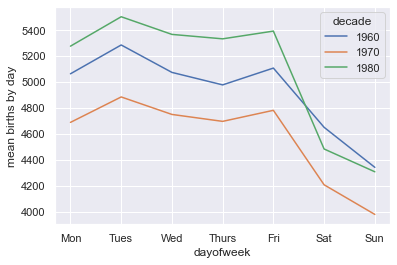

In [60]:
births.pivot_table("births", index="dayofweek", columns="decade", aggfunc='mean').plot()
plt.gca().set_xticks(range(7))
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

In [61]:
births_by_date = births.pivot_table("births", [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [62]:
# turn the index into a date variable by using dummy year value, 2012 (which is leap and has feburary 29th)

births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]
births_by_date.head()

C:\Users\Laimonas\AppData\Local\Temp/ipykernel_19748/3006980653.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


<AxesSubplot:>

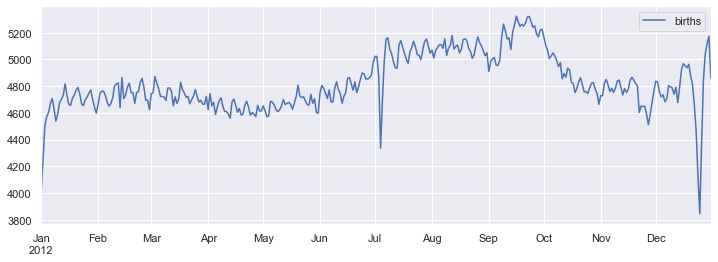

In [63]:
fig, ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)